In [2]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import seaborn as sns
%matplotlib inline

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the f

Fix random seed for reproducibility

In [3]:
np.random.seed(7)

Create a data set with only 100 rows, that is easy to plot

In [4]:
data_size = 100
epochs = 500

Create a random data set with random labels

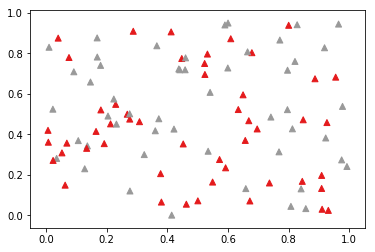

In [5]:
data = np.random.random((data_size, 2))
labels_random = np.random.randint(2, size=(data_size, 1))

fig, ax = plt.subplots()
ax.scatter(x=data[:, 0], y=data[:, 1], c=labels_random[:, 0],
            cmap=cm.Set1, marker='^')

Create a function to create neural networks

In [6]:
def create_model(input_dim):
    ' create a fully connected neural network with one hidden layer '
    model = Sequential()
    model.add(Dense(10, activation='relu', input_dim=input_dim))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

Fit the model to a random model

In [16]:
model = create_model(input_dim=2)
fit = model.fit(
    data, labels_random, epochs=epochs, validation_split=0.20, verbose=0)

Plot the loss curve for the training and test set

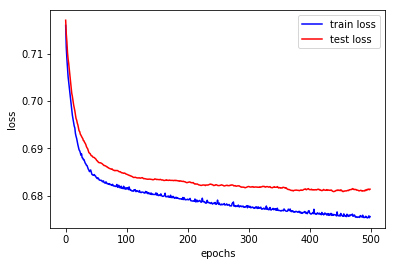

In [17]:
def plot_loss(fit):
    fig, ax = plt.subplots()
    ax.plot(fit.history['loss'], c='blue', label='train loss')
    ax.plot(fit.history['val_loss'], c='red', label='test loss')
    ax.set_xlabel('epochs')
    ax.set_ylabel('loss')
    ax.legend()
    
plot_loss(fit)

Create data with the first two columns of random data where the label can be predicted from the two columns

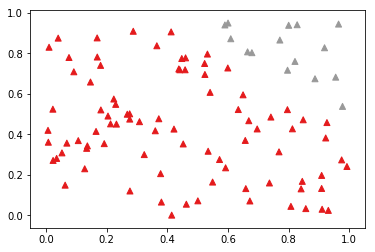

In [18]:
indicator = data[:, 0] * data[:, 1]
indicator = indicator.reshape((-1, 1))
labels = np.array(indicator > 0.5, dtype=int)

plt.scatter(x=data[:, 0], y=data[:, 1], c=labels[:, 0],
            cmap=cm.Set1, marker='^')

Predict the label using the two columns

In [19]:
model = create_model(input_dim=2)
fit = model.fit(
    data, labels, epochs=epochs, validation_split=0.20, verbose=0)

The loss decreases for both the training and test set. The neural network can predict the label of the test set

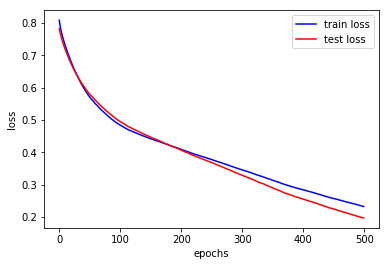

In [20]:
plot_loss(fit)

In [21]:
pred_labels = model.predict_classes(data)

Display the confusion matrix

In [22]:
cmatrix = confusion_matrix(labels, pred_labels)
df_cm = pd.DataFrame(cmatrix)
df_cm

,0,1
0,85,0
1,11,4


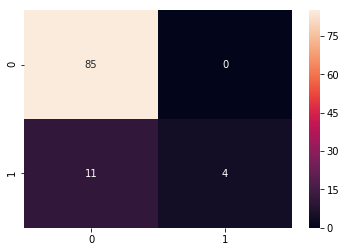

In [23]:
sns.heatmap(df_cm, annot=True)